In [5]:
import tkinter as tk
import seaborn as sns
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt


In [ ]:
#import mysql.connector  # Ensure this is imported
from mysql.connector import Error

try:
    # Establishing connection
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="1234"  #ID and Password
    )
    if mydb.is_connected():
        print("Connection successful")
except Error as e:
    print(f"Error occurred: {e}")


Connection successful


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\kaush\AppData\Local\Temp\ipykernel_20512\2031953965.py", line 39, in validate_login
    self.open_main_app()  # Open the main application
    ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaush\AppData\Local\Temp\ipykernel_20512\2031953965.py", line 46, in open_main_app
    app = TravelActivityApp(root)
          ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaush\AppData\Local\Temp\ipykernel_20512\2031953965.py", line 59, in __init__
    self.create_widgets()
  File "C:\Users\kaush\AppData\Local\Temp\ipykernel_20512\2031953965.py", line 128, in create_widgets
    self.canvas_frame = tk.Frame(self)
                        ^^^^^^^^^^^^^^
  File "c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 3224, in __init__
    Wi

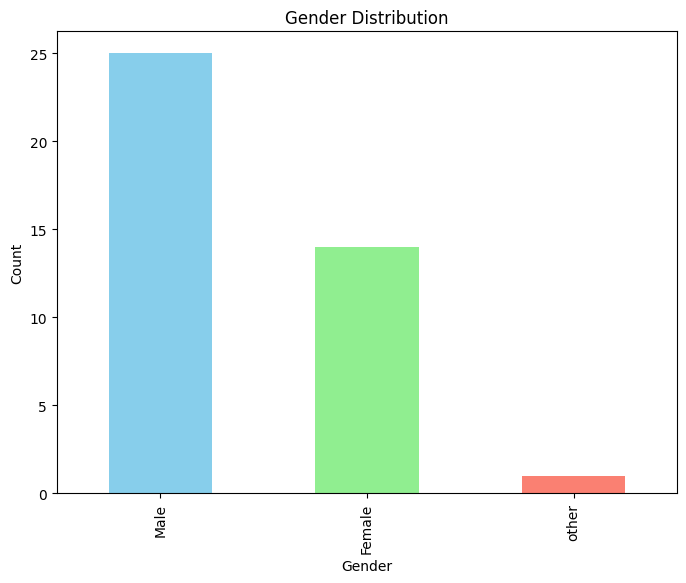

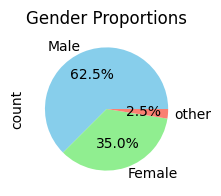

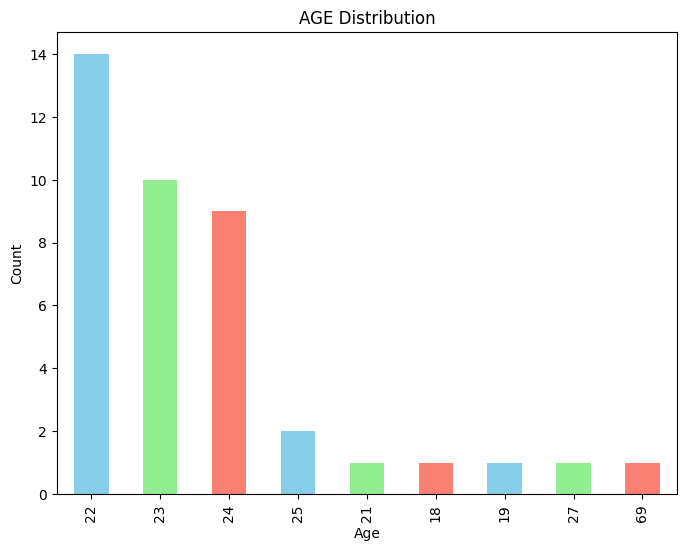

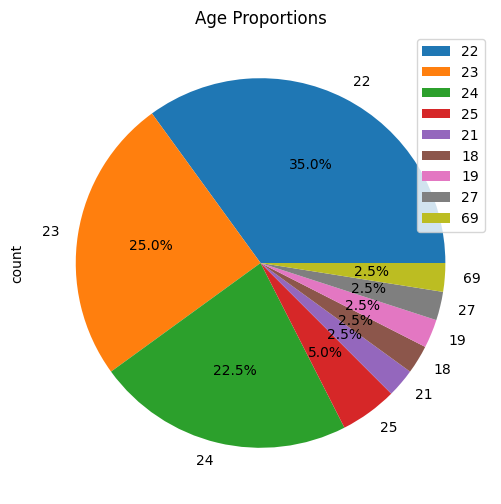

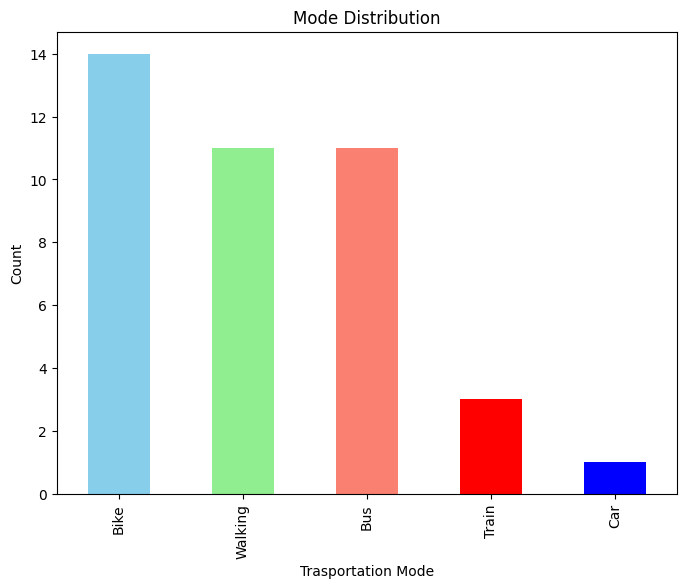

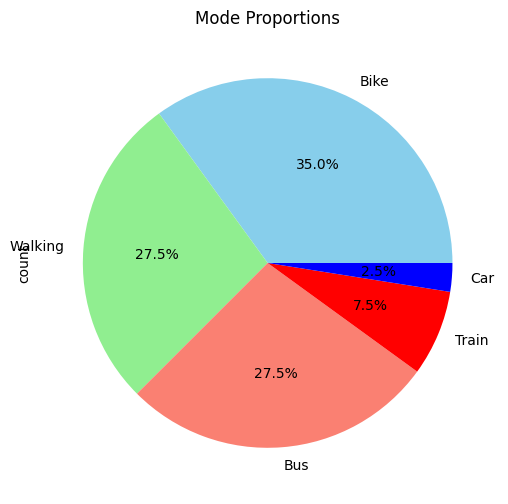

In [7]:
from tkinter import ttk, filedialog, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Login Page Class
class LoginPage:
    def __init__(self, root):
        self.root = root
        self.root.title("Login Page")
        self.root.geometry("400x250")

        # Create UI components for login
        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.root, text="Login to Access the App", font=("Helvetica", 16)).pack(pady=20)

        # Username Label and Entry
        tk.Label(self.root, text="Username:").pack(pady=5)
        self.username_entry = tk.Entry(self.root, width=30)
        self.username_entry.pack()

        # Password Label and Entry
        tk.Label(self.root, text="Password:").pack(pady=5)
        self.password_entry = tk.Entry(self.root, width=30, show="*")
        self.password_entry.pack()

        # Login Button
        login_btn = tk.Button(self.root, text="Login", command=self.validate_login)
        login_btn.pack(pady=10)

    def validate_login(self):
        """Validate username and password."""
        username = self.username_entry.get().strip()
        password = self.password_entry.get().strip()

        if username == "1234" and password == "1234":
            messagebox.showinfo("Login Successful", "Welcome to the Transportation Travel Activity App!")
            self.root.destroy()  # Close the login window
            self.open_main_app()  # Open the main application
        else:
            messagebox.showerror("Login Failed", "Invalid username or password.")

    def open_main_app(self):
        """Open the main application after login."""
        root = tk.Tk()
        app = TravelActivityApp(root)
        root.mainloop()


# Main Application Class
class TravelActivityApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Transportation Travel Activity Project")
        self.root.geometry("1000x600")
        self.data = None  # Initialize data attribute

        # Add UI components
        self.create_widgets()

    def create_widgets(self):
        # Title Label
        title_label = tk.Label(self.root, text="Transportation Travel Activity", font=("Helvetica", 16))
        title_label.pack(pady=10)

        # Load File Button
        load_btn = tk.Button(self.root, text="Load CSV File", command=self.load_csv)
        load_btn.pack(pady=10)

        # Add Data Button
        add_data_btn = tk.Button(self.root, text="Add Data", command=self.open_add_data_window)
        add_data_btn.pack(pady=10)

        # Search Frame
        search_frame = tk.Frame(self.root)
        search_frame.pack(pady=10)

        # Filter by Name
        tk.Label(search_frame, text="Filter by Name: ").grid(row=0, column=0, padx=5)
        self.search_entry = tk.Entry(search_frame, width=20)
        self.search_entry.grid(row=0, column=1, padx=5)

        search_btn = tk.Button(search_frame, text="Search", command=self.filter_data_by_name)
        search_btn.grid(row=0, column=2, padx=5)

        tk.Label(search_frame, text="Filter by Age: ").grid(row=1, column=0, padx=5)
        self.age_entry = tk.Entry(search_frame, width=20)
        self.age_entry.grid(row=1, column=1, padx=5)

        filter_age_btn = tk.Button(search_frame, text="Filter by Age", command=self.filter_data_by_age)
        filter_age_btn.grid(row=1, column=2, padx=5)

        tk.Label(search_frame, text="Filter by Gender: ").grid(row=2, column=0, padx=5)
        self.gender_combobox = ttk.Combobox(search_frame, values=["Male", "Female", "Other"], width=18)
        self.gender_combobox.grid(row=2, column=1, padx=5)

        filter_gender_btn = tk.Button(search_frame, text="Filter by Gender", command=self.filter_data_by_gender)
        filter_gender_btn.grid(row=2, column=2, padx=5)
        

        # Data Table
        self.tree = ttk.Treeview(self.root, columns=(  # Ensure the columns match your CSV data
            "Name", "Age", "Gender", "Occupation", "Location", "Distance", "Mode", "Frequency",
            "Commute Time", "Commute Days", "Daily Cost", "Monthly Cost", "Satisfaction", "Cleanliness",
            "Safety", "Accessibility", "Environment", "Switch", "Apps", "Payment", "Impact on Daily Schedule", "Commute Effect"
        ), show="headings")

        # Define column headers
        for col in self.tree["columns"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, width=100, anchor="center")

        self.tree.pack(fill=tk.BOTH, expand=True)

        # Save to Database Button
        save_to_db_btn = tk.Button(self.root, text="Save to Database", command=self.save_all_data_to_database)
        save_to_db_btn.pack(pady=10)
        
        # Graph Button
        graph_btn = tk.Button(self.root, text="View Graphs", command=self.show_graph_window)
        graph_btn.pack(pady=10)

        # Fetch and Display Data from Database Button
        fetch_data_btn = tk.Button(self.root, text="Show All Data from Database", command=self.fetch_data_from_database)
        fetch_data_btn.pack(pady=10)

        # Frame for the canvas and scrollbar
        self.canvas_frame = tk.Frame(self)
        self.canvas_frame.pack(fill=tk.BOTH, expand=True)

        # Create a canvas for holding the graphs
        self.canvas = tk.Canvas(self.canvas_frame)
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        # Add a scrollbar to the canvas
        self.scrollbar = tk.Scrollbar(self.canvas_frame, orient=tk.VERTICAL, command=self.canvas.yview)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        # Link scrollbar to canvas
        self.canvas.configure(yscrollcommand=self.scrollbar.set)

        # Create a scrollable frame inside the canvas
        self.scrollable_frame = tk.Frame(self.canvas)
        self.canvas.create_window((0, 0), window=self.scrollable_frame, anchor="nw")

        # Update the scrollable region
        self.scrollable_frame.bind(
            "<Configure>", lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all"))
        )


    def load_csv(self):
        """Load the CSV file into the application."""
        file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
        if file_path:
            try:
                self.data = pd.read_csv(file_path)
                self.display_data(self.data)
                messagebox.showinfo("Success", "CSV file loaded successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load file: {e}")

    def display_data(self, data):
        """Display the data in the Treeview widget."""
        if self.tree is None:
            messagebox.showerror("Error", "Table widget is not initialized.")
            return

        # Clear the current table
        for row in self.tree.get_children():
            self.tree.delete(row)

        # Add rows
        for _, row in data.iterrows():
            self.tree.insert("", tk.END, values=row.tolist())

    def filter_data_by_name(self):
        """Filter data based on name input."""
        if self.data is None:
            messagebox.showwarning("Warning", "No data loaded!")
            return

        search_value = self.search_entry.get().strip()
        if search_value:
            filtered_data = self.data[self.data["Name"].str.contains(search_value, case=False, na=False)]
            if not filtered_data.empty:
                self.display_data(filtered_data)
            else:
                messagebox.showinfo("Info", "No matching records found.")
        else:
            self.display_data(self.data)

    def filter_data_by_age(self):
        """Filter data based on age input."""
        if self.data is None:
            messagebox.showwarning("Warning", "No data loaded!")
            return

        try:
            age_to_find = int(self.age_entry.get().strip())
            filtered_data = self.data[self.data["Age"] == age_to_find]
            if not filtered_data.empty:
                self.display_data(filtered_data)
            else:
                messagebox.showinfo("Info", "No records found for the entered age.")
        except ValueError:
            messagebox.showerror("Error", "Please enter a valid integer for age.")

    def filter_data_by_gender(self):
        """Filter data based on gender input."""
        if self.data is None:
            messagebox.showwarning("Warning", "No data loaded!")
            return

        gender_to_find = self.gender_combobox.get().strip()
        if gender_to_find:
            filtered_data = self.data[self.data["Gender"] == gender_to_find]
            if not filtered_data.empty:
                self.display_data(filtered_data)
            else:
                messagebox.showinfo("Info", "No records found for the selected gender.")
        else:
            messagebox.showerror("Error", "Please select a gender to filter.")
    
    def show_graph_window(self):
    #"""Display multiple graphs based on data."""
        if self.data is None or self.data.empty:
            messagebox.showwarning("Warning", "No data available to plot.")
            return

        # Create a new window to display the graph
        graph_window = tk.Toplevel(self.root)
        graph_window.title("Graphs")
        graph_window.geometry("800x800")

        # Create a frame for the canvas (for better organization)
        canvas_frame = tk.Frame(graph_window)
        canvas_frame.pack(fill=tk.BOTH, expand=True)

        #Bar Chart: Gender Distribution
        gender_count = self.data['Gender'].value_counts()
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="bar", ax=ax1, color=['skyblue', 'lightgreen', 'salmon'])
        ax1.set_title('Gender Distribution')
        ax1.set_xlabel('Gender')
        ax1.set_ylabel('Count')
        canvas1 = FigureCanvasTkAgg(fig1, master=canvas_frame)
        canvas1.draw()
        canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        #Pie Chart: Gender Proportions
        fig2, ax2 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="pie", ax=ax2, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'], legend=False)
        ax2.set_title('Gender Proportions')
        canvas2 = FigureCanvasTkAgg(fig2, master=canvas_frame)
        canvas2.draw()
        canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        gender_count = self.data['Age'].value_counts()
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="bar", ax=ax1, color=['skyblue', 'lightgreen', 'salmon'])
        ax1.set_title('AGE Distribution')
        ax1.set_xlabel('Age')
        ax1.set_ylabel('Count')
        canvas1 = FigureCanvasTkAgg(fig1, master=canvas_frame)
        canvas1.draw()
        canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # 2. Pie Chart: Age Proportions
        fig2, ax2 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="pie", ax=ax2, autopct='%1.1f%%', legend=True)
        ax2.set_title('Age Proportions')
        canvas2 = FigureCanvasTkAgg(fig2, master=canvas_frame)
        canvas2.draw()
        canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        gender_count = self.data['Mode'].value_counts()
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="bar", ax=ax1, color=['skyblue', 'lightgreen', 'salmon', 'red', 'blue'])
        ax1.set_title('Mode Distribution')
        ax1.set_xlabel('Trasportation Mode')
        ax1.set_ylabel('Count')
        canvas1 = FigureCanvasTkAgg(fig1, master=canvas_frame)
        canvas1.draw()
        canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # 2. Pie Chart: Gender Proportions
        fig2, ax2 = plt.subplots(figsize=(8, 6))
        gender_count.plot(kind="pie", ax=ax2, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon','red', 'blue'], legend=False)
        ax2.set_title('Mode Proportions')
        canvas2 = FigureCanvasTkAgg(fig2, master=canvas_frame)
        canvas2.draw()
        canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
  
    
    def open_add_data_window(self):
        #def open_add_data_window(self):
        add_window = tk.Toplevel(self.root)
        add_window.title("Add New Data")
        add_window.geometry("500x800")

        # Fields with labels and specific dropdown options
        fields = [
            ("Name", None),  # Name as text input
            ("Age", None),  # Dropdown for age (1 to 120)
            ("Gender", ["Male", "Female", "Other"]),
            ("Occupation", ["Student", "Teacher", "Government Job", "Entrepreneur/Business Owner", "Unemployed", "Private sector"]),
            ("Location", ["PG", "Hostel", "Home"]),
            ("Distance (km)", [str(i) for i in range(1, 60)]),  # Dropdown for distances up to 100km
            ("Mode", ["Walking", "Bus", "Bicycle", "Train", "Car", "Bike"]),
            ("Frequency", ["Daily", "Weekly", "Monthly", "Rarely"]),
            ("Commute Time", ["Less than 15 minutes", "15-30 minutes", "30-60 minutes", "More than 60 minutes"]),
            ("Commute Days", ["Less than 3 Days", "4 Days", "5 Days", "6 Days", "Whole week"]),
            ("Daily Cost", ["Less than 50", "50-100", "100-200", "200-300", "None"]),
            ("Monthly Cost", ["Less than 1000", "1000-2000", "2000-3000", "More than 3000", "None"]),
            ("Satisfaction", ["Very Satisfied", "Satisfied", "Neutral", "Dissatisfied", "Very Dissatisfied"]),
            ("Cleanliness", ["Very Satisfied", "Satisfied", "Neutral", "Dissatisfied", "Very Dissatisfied"]),
            ("Safety", ["Very Safe", "Safe", "Neutral", "Unsafe", "Very Unsafe"]),
            ("Accessibility", ["Very Easy", "Easy", "Neutral", "Difficult", "Very Difficult"]),
            ("Environment", ["Very Important", "Important", "Neutral", "Not Important", "Not at all Important"]),
            ("Switch", ["Yes", "No", "Maybe"]),
            ("Apps", ["Navigation apps", "Ride-sharing apps", "Public transit apps", "None", "Other"]),
            ("Payment", ["Cash", "Card", "UPI", "Any other Mobile app", "Other"]),
            ("Impact on Daily Schedule", ["Very Positively", "Positively", "Neutrally", "Negatively", "Very Negatively"]),
            ("Commute Effect", ["Very Positively", "Positively", "Neutrally", "Negatively", "Very Negatively"])
        ]

        self.entries = {}

        for i, (field, options) in enumerate(fields):
            label = tk.Label(add_window, text=field, font=("Helvetica", 10))
            label.grid(row=i, column=0, padx=10, pady=5, sticky="w")

            if options:  # Dropdown options
                entry = ttk.Combobox(add_window, values=options, state="readonly")
                entry.grid(row=i, column=1, padx=10, pady=5)
                entry.set(options[0])  # Default to the first option
            else:  # Text input for Name
                entry = tk.Entry(add_window)
                entry.grid(row=i, column=1, padx=10, pady=5)

            self.entries[field] = entry

        # Add Button
        add_button = tk.Button(add_window, text="Add", command=lambda: self.add_new_data(add_window))
        add_button.grid(row=len(fields), columnspan=2, pady=10)

    def add_new_data(self, add_window):
        """Collect form data and update the DataFrame."""
        new_data = {}
        for field, widget in self.entries.items():
            if isinstance(widget, tk.Entry):  # Text input
                new_data[field] = widget.get().strip()
            elif isinstance(widget, ttk.Combobox):  # Dropdown
                new_data[field] = widget.get().strip()

        # Validate required fields
        if not new_data.get("Name") or not new_data.get("Age"):
            messagebox.showerror("Error", "Name and Age are required fields.")
            return

        # Convert the new_data dictionary to a DataFrame row
        new_df = pd.DataFrame([new_data])

        if self.data is None:
            self.data = new_df
        else:
            self.data = pd.concat([self.data, new_df], ignore_index=True)

        self.display_data(self.data)
        add_window.destroy()

    def save_all_data_to_database(self):
    #"""Save all displayed data in Treeview to MySQL database, avoiding duplicates."""
        if self.data is None or self.data.empty:
            messagebox.showwarning("Warning", "No data to save! Please load or add data first.")
            return

        try:
            # Connect to the database
            connection = mysql.connector.connect(
                host="localhost",       # Replace with your MySQL host
                user="root",            # Replace with your MySQL username
                password="1234",        # Replace with your MySQL password
                database="travel"    # Replace with your database name
            )

            if connection.is_connected():
                cursor = connection.cursor()

                # Create table if it does not exist
                create_table_query = """
                CREATE TABLE IF NOT EXISTS commute_data (
                    Name VARCHAR(100),
                    Age INT,
                    Gender VARCHAR(10),
                    Occupation VARCHAR(50),
                    Location VARCHAR(50),
                    Distance VARCHAR(10),
                    Mode VARCHAR(20),
                    Frequency VARCHAR(20),
                    CommuteTime VARCHAR(50),
                    CommuteDays VARCHAR(50),
                    DailyCost VARCHAR(20),
                    MonthlyCost VARCHAR(20),
                    Satisfaction VARCHAR(20),
                    Cleanliness VARCHAR(20),
                    Safety VARCHAR(20),
                    Accessibility VARCHAR(20),
                    Environment VARCHAR(20),
                    Switch VARCHAR(10),
                    Apps VARCHAR(50),
                    Payment VARCHAR(20),
                    ImpactOnDailySchedule VARCHAR(50),
                    CommuteEffect VARCHAR(50)
                );
                """
                cursor.execute(create_table_query)

                # Insert data into the table
                for _, row in self.data.iterrows():
                    # Check if the record already exists
                    check_query = """
                    SELECT * FROM commute_data 
                    WHERE Name = %s AND Age = %s AND Gender = %s AND Occupation = %s AND Location = %s AND Distance = %s 
                    AND Mode = %s AND Frequency = %s AND CommuteTime = %s AND CommuteDays = %s AND DailyCost = %s 
                    AND MonthlyCost = %s AND Satisfaction = %s AND Cleanliness = %s AND Safety = %s AND Accessibility = %s 
                    AND Environment = %s AND Switch = %s AND Apps = %s AND Payment = %s 
                    AND ImpactOnDailySchedule = %s AND CommuteEffect = %s;
                    """
                    cursor.execute(check_query, row.tolist())
                    result = cursor.fetchone()

                    if not result:  # If no matching record is found, insert the new one
                        insert_query = """
                        INSERT INTO commute_data (
                            Name, Age, Gender, Occupation, Location, Distance, Mode, Frequency, CommuteTime,
                            CommuteDays, DailyCost, MonthlyCost, Satisfaction, Cleanliness, Safety, Accessibility,
                            Environment, Switch, Apps, Payment, ImpactOnDailySchedule, CommuteEffect
                        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                        """
                        cursor.execute(insert_query, row.tolist())
                connection.commit()

                messagebox.showinfo("Success", "Data saved to the database successfully, avoiding duplicates!")

        except mysql.connector.Error as e:
            messagebox.showerror("Database Error", f"Error: {str(e)}")

        finally:
            if connection.is_connected():
                cursor.close()
                connection.close()
    
    def fetch_data_from_database(self):
    #"""Fetch all data from the database and display it in the Treeview."""
        try:
            # Connect to the database
            connection = mysql.connector.connect(
                host="localhost",       # Replace with your MySQL host
                user="root",            # Replace with your MySQL username
                password="1234",        # Replace with your MySQL password
                database="travel"    # Replace with your database name
            )

            if connection.is_connected():
                cursor = connection.cursor(dictionary=True)

                # Fetch all data from the database
                fetch_query = "SELECT * FROM commute_data;"
                cursor.execute(fetch_query)
                records = cursor.fetchall()

                if records:
                    # Convert fetched records to a DataFrame
                    self.data = pd.DataFrame(records)
                    self.display_data(self.data)  # Display data in Treeview
                    messagebox.showinfo("Success", "Data fetched from the database successfully!")
                else:
                    messagebox.showinfo("Info", "No records found in the database.")

        except mysql.connector.Error as e:
            messagebox.showerror("Database Error", f"Error: {str(e)}")

        finally:
            if connection.is_connected():
                cursor.close()
                connection.close()




# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    login_page = LoginPage(root)
    root.mainloop()